# Ce TP est réalisé par le quadrinome :
     Mekdoud Rachid
     Mokhbat Selma
     Kerdjoudj Mohamed
     Hezouat Abdeldjalil

# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [331]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [332]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [333]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [334]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

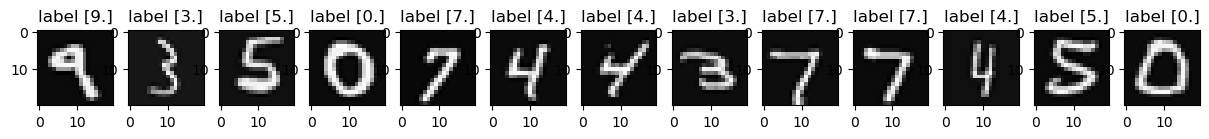

In [335]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1, régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [336]:
def lrCostFunction (X, y, initial_theta, alpha, MaxIter,lambda_):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    m, n = X.shape
    
    theta = initial_theta.reshape((n, 1))
    J_history = np.zeros((MaxIter, 1))
    
    for i in range(MaxIter):
        z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-z))
        
        J = (-1/m) * np.sum((y * np.log(h)) + ((1-y) * np.log(1-h))) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
        J_history[i] = J
        gradient = (1/m) * np.dot(X.T, (h - y))
        gradient[1:] = gradient[1:] + (lambda_/m) * theta[1:]
        
        theta = theta - alpha * gradient
    
    return theta
#, J_history
    


In [337]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [338]:
def predictOnveVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique, 
    # nous aiemrions retourner les etiquettes predites
    
    # Ici chaque classifieur retournera de probabilité, il faudra choisir 
    # la probabilité maximale 
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmemples
     # Calculer la probabilité de chaque classe pour chaque exemple
    probs = sigmoid(X.dot(all_theta.T))
    # Choisir la classe ayant la probabilité la plus élevée pour chaque exemple
    y_pred = np.argmax(probs, axis=1)
    return y_pred.reshape((X.shape[0], 1))

Appel aux fonctions

In [339]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]))
all_theta.shape 

(10, 401)

In [340]:
MaxIter= 1000
lambda_= 0.1
alpha = 0.5
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1))
for i in range (number_classes):
     # appel pour chaque classifieur
    theta = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_)
    all_theta[i,:] = theta.T
    #affichage 
    print("La forme de all_theta après le {} ème classifieur est {}".format(i+1, all_theta.shape))

La forme de all_theta après le 1 ème classifieur est (10, 401)
La forme de all_theta après le 2 ème classifieur est (10, 401)
La forme de all_theta après le 3 ème classifieur est (10, 401)
La forme de all_theta après le 4 ème classifieur est (10, 401)
La forme de all_theta après le 5 ème classifieur est (10, 401)
La forme de all_theta après le 6 ème classifieur est (10, 401)
La forme de all_theta après le 7 ème classifieur est (10, 401)
La forme de all_theta après le 8 ème classifieur est (10, 401)
La forme de all_theta après le 9 ème classifieur est (10, 401)
La forme de all_theta après le 10 ème classifieur est (10, 401)


In [341]:
y_pred = predictOnveVsAll (all_theta, X)

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [342]:
precision = np.mean(y==y_pred)*100
precision

92.14

# Partie 2: Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [343]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape 

(25, 401)

In [344]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [345]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10 

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [346]:
def predict(W1, W2, X):
    # Nombre d'exemples dans X
    m = y.shape[0]
    # Calcul de la sortie de la couche cachée
    z2 = np.dot(X, W1)
    a2 = sigmoid(z2)
    
    a2 = np.hstack((np.ones((m, 1)), a2))

    # Calcul de la sortie de la couche de sortie
    z3 = np.dot(a2, W2)
    a3 = sigmoid(z3)

    # Prédiction de la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    y_pred = np.argmax(a3, axis=1) + 1

    return y_pred.reshape((m, 1))



In [347]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(W1.T, W2.T, X)
precision = np.mean(y==y_pred)*100
precision

87.6

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [348]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42,max_iter=1000)
model.fit(X, y.squeeze())
y_pred = model.predict(X)
precision = np.mean(y==y_pred.reshape(y.shape[0],1))*100
print("precision with sklearn is :",precision)


precision with sklearn is : 96.24000000000001


# Comparaison : 

Nous remarquons que me classifieur RL a une précision de 92,14%, le réseau de neurones a une précision de 87,6% et le modèle de régression logistique de scikit-learn a une précision de 96,24%. En termes de précision, le modèle de régression logistique de scikit-learn est le plus performant, suivi par le classifieur RL, puis par le réseau de neurones. Il est important de noter que la précision peut être sensible aux paramètres de l'algorithme et à la façon dont les données ont été pré-traitées, 

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

    1-Ajouter plus de données, il est possible que les modèles n'aient pas suffisamment de données pour s'entraîner correctement.
     2-Modifier les hyperparamètres : Les modèles ont des hyperparamètres (tels que le taux d'apprentissage pour le réseau de neurones) qui peuvent être ajustés pour améliorer les performances.
     3-Utiliser d'autres algorithmes d'apprentissage : Il existe de nombreux autres algorithmes d'apprentissage, tels que les SVM. 
     

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Mardi 09 Mai 2023


In [349]:
# bonne chance